In [1]:
import sys,os
import torch
sys.path.append('../')
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
from fast_jtnn import *
import pandas as pd

Load Model

In [2]:
generator = LigandGenerator()

/home/nickyang69/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Random Sampling

In [ ]:
numsmiles = 5
smiles = generator.randomgen(numsmiles)
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5,subImgSize=(500,500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles,subImgSize=(500,500), legends=smiles)

img

Sampling from Target (without LFS)

In [ ]:
target_smile = 'c1ccccc1'
numsmiles = 3
step_size = 0.01
smiles = generator.gen_from_target_withoutprop(target_smile,numsmiles)
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5,subImgSize=(500,500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles,subImgSize=(500,500), legends=smiles)

img


Optimization Target(with LFS)

Running optimizaiotn...
Start decoding...


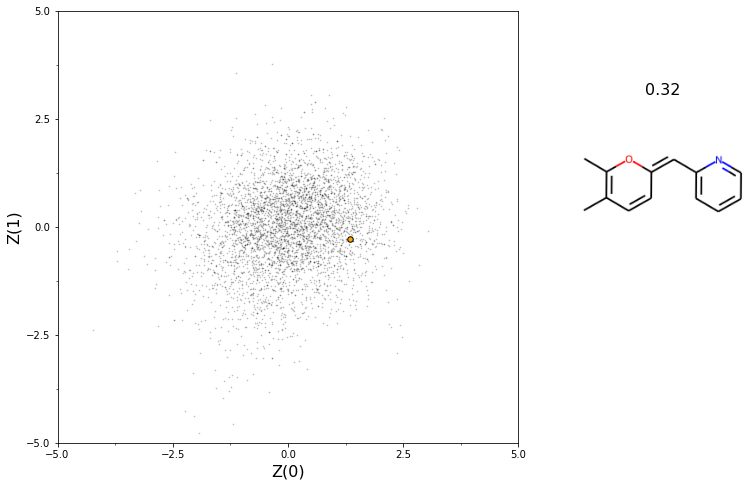

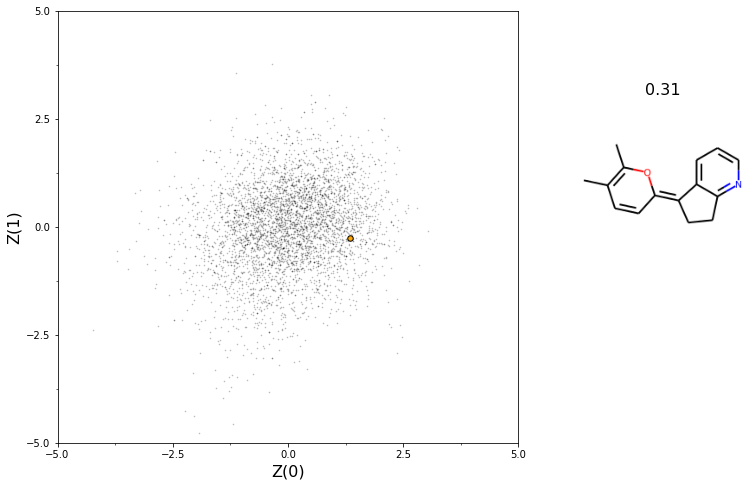

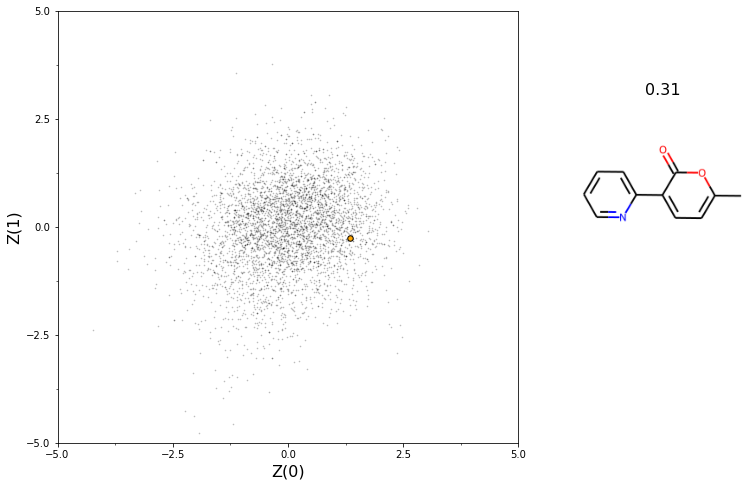

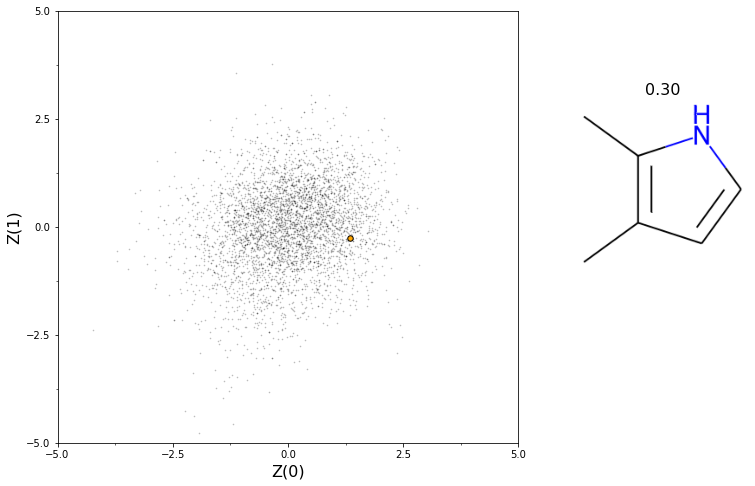

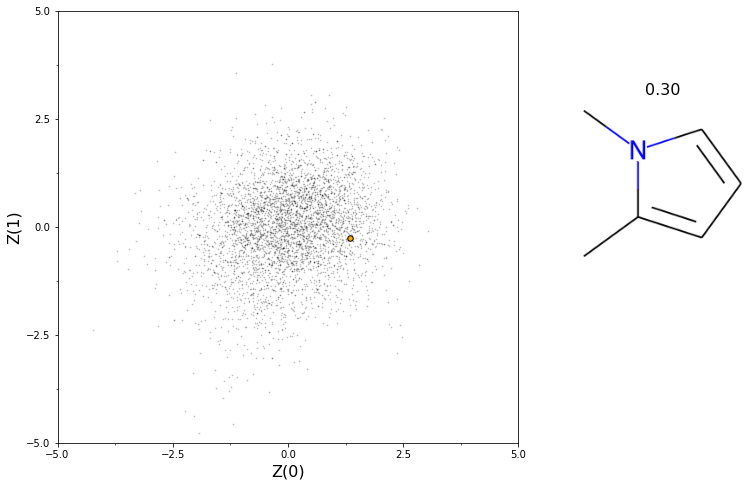

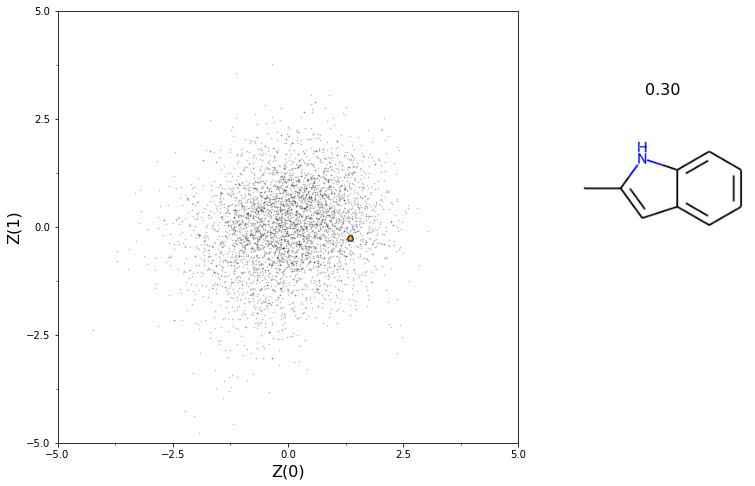

In [8]:
smile = 'CC#N'
lfs_target = 1
smis, zs, ps = generator.LFS_optimization(lfs_target,smile,sign=-1,step_size=0.02,max_cycle=100)
for i in range(len(smis)):
    generator.scatter_plot(zs[i],smis[i],ps[i])

In [ ]:
from matplotlib import pyplot as plt, ticker
xmin, xmax = -5, 5
ymin, ymax = -5, 5
xmajor, xminor = 2.5, 1.25
ymajor, yminor = 2.5, 1.25
df = pd.DataFrame(zs)
train_data = generator.scaler.transform(df)
fig, ax = plt.subplots(figsize=(8, 7))
dim1 = 0
dim2 = 1
xlabel = 'Z(%s)' % dim1
ylabel = 'Z(%s)' % dim2

ax.xaxis.set_major_locator(ticker.MultipleLocator(xmajor))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(xminor))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ymajor))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(yminor))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(xlabel, fontsize=16)
ax.set_ylabel(ylabel, fontsize=16)

ax.scatter(generator.x_train, generator.y_train, c='black', s=0.5, edgecolors='black', alpha=0.2)
ax.scatter(train_data[0][dim1],train_data[0][dim2],c='orange', s=30, edgecolors='black', alpha=1)
